# Synthetic data

The aim of this notebook is to illustrate the PCA tool using synthetic data.

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets
from scipy.spatial import distance
from geopy.distance import geodesic
from geopy.geocoders import Nominatim

##### Data creation

In [19]:
# Synthetic data
N = 900
alpha = 25
beta = 10
gamma = 25
df = pd.DataFrame()
nb_comp = 5
var = 5
targets = ['Set 1', 'Set 2', 'Set 3']
#df['age'] = np.hstack([np.linspace(10, 50,N//2), np.linspace(50, 100,N//2)]) + np.random.normal(5, 3, N)
df['age'] = np.round(np.random.uniform(0,100, N))
#df['age'] = np.round(np.random.normal(50, 2, N))
df['particle 1'] =  np.random.normal(10, var,N)
df['particle 2'] =  np.hstack([np.random.normal(10, var,N//2), np.random.normal(50, var,N//2)])
df['desease 1'] = df['particle 1']*alpha + beta*df['age']
df['disease 2'] = df['particle 2']*gamma 

print('Synthetic data')
display(df)

Synthetic data


,age,particle 1,particle 2,desease 1,disease 2
0,78.0,10.705432,3.846817,1047.635788,96.170428
1,84.0,7.830804,12.740303,1035.770096,318.507564
2,61.0,18.709129,8.398730,1077.728230,209.968250
3,75.0,7.089152,3.526566,927.228791,88.164147
4,56.0,9.714874,7.666261,802.871838,191.656529
...,...,...,...,...,...
895,76.0,16.961828,46.831837,1184.045711,1170.795932
896,46.0,5.544417,50.879348,598.610433,1271.983702
897,19.0,12.306471,43.527229,497.661779,1088.180720
898,47.0,10.435792,41.529054,730.894804,1038.226344


##### Apply PCA to Data

In [20]:
# Standardizse the features
df_norm = (df-df.mean())/df.std()

# Apply PCA
pca = decomposition.PCA(n_components=5)
PCA_df = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['Component #1', 'Component #2', 'Component #3', 'Component #4','Component #5'])
print("After PCA")
print("Singular values:", pca.singular_values_)

# Append the target Label columns
target = pd.Series(np.hstack([np.zeros(N//2),np.ones(N//2)]) , name='label')

df = pd.concat([df, target], axis = 1)
PCA_df = pd.concat([PCA_df, target], axis = 1)
PCA_df

After PCA
Singular values: [4.25841576e+01 4.18298137e+01 3.05263199e+01 1.12925446e-14
 4.06919855e-15]


,Component #1,Component #2,Component #3,Component #4,Component #5,label
0,-2.172457,-0.234980,-0.084244,5.388612e-16,1.519536e-15,0.0
1,-1.643885,-0.516825,-0.717059,1.442729e-15,3.034271e-17,0.0
2,-1.904466,-0.415729,1.665583,1.038744e-14,-1.174435e-16,0.0
3,-1.950765,0.212997,-0.767711,1.480926e-16,-1.205043e-16,0.0
4,-1.404632,0.598569,-0.059236,2.082218e-16,-1.089566e-16,0.0
...,...,...,...,...,...,...
895,0.114203,-2.138893,1.149117,-1.610080e-16,2.540636e-16,1.0
896,1.574701,-0.077883,-0.803685,2.614731e-16,-3.200612e-17,1.0
897,1.423184,0.644575,0.808274,-4.454653e-17,-7.386401e-17,1.0
898,0.765173,-0.236244,0.156730,1.203055e-16,1.458005e-16,1.0


##### Plots

In [21]:
def plot_PCA(comp_1, comp_2):
    
    x = PCA_df.iloc[:,comp_1]
    y = PCA_df.iloc[:,comp_2]

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.25]
    rect_histy = [left_h, bottom, 0.25, height]

    # start with a rectangular Figure
    plt.figure(1, figsize=(12, 12))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    targets = ['young', 'old']

    # the scatter plot:
    for idt, _ in enumerate(targets):
        axScatter.scatter(PCA_df[PCA_df['label'] == idt].iloc[:,comp_1], 
                   PCA_df[PCA_df['label'] == idt].iloc[:,comp_2])


    # now determine nice limits by hand:
    binwidth = 0.2
    xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
    lim = (int(xymax/binwidth) + 1) * binwidth

    axScatter.set_xlim((-lim, lim))
    axScatter.set_ylim((-lim, lim))

    bins = np.arange(-lim, lim + binwidth, binwidth)
    axHistx.hist(x, bins=bins)
    axHisty.hist(y, bins=bins, orientation='horizontal')

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())

    axHistx.set_xticks([])
    axHisty.set_yticks([])

    axScatter.legend(targets)
    axScatter.grid()
    axScatter.set_xlabel('Component #'+str(comp_1+1), fontsize = 15)
    axScatter.set_ylabel('Component #'+str(comp_2+1), fontsize = 15)
    plt.show()

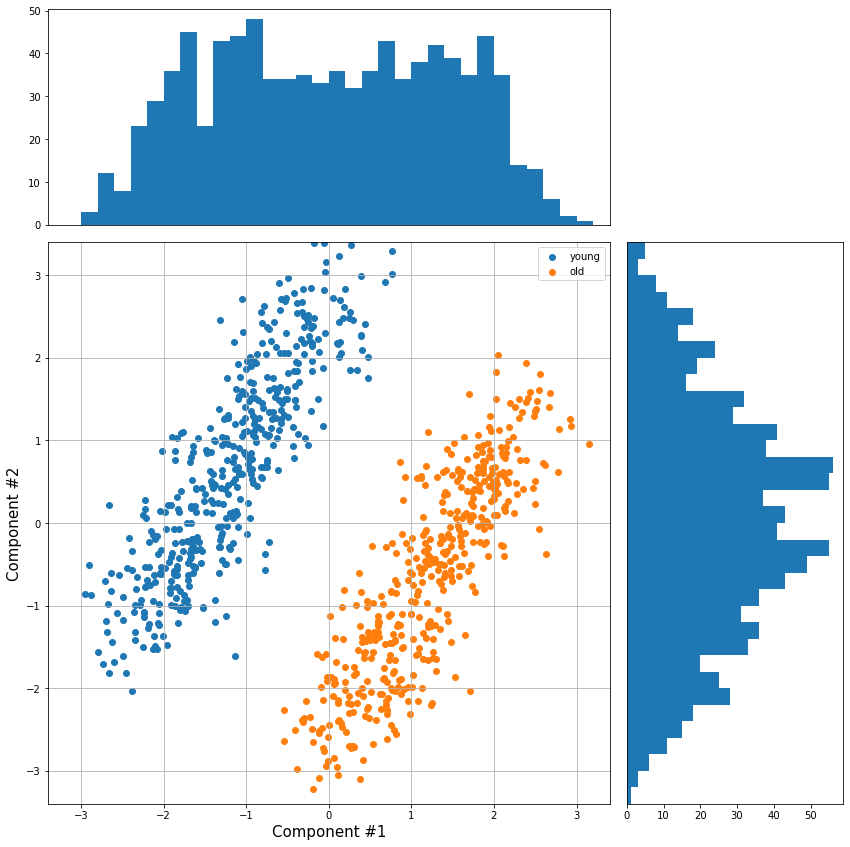

In [22]:
plot_PCA(0,1)

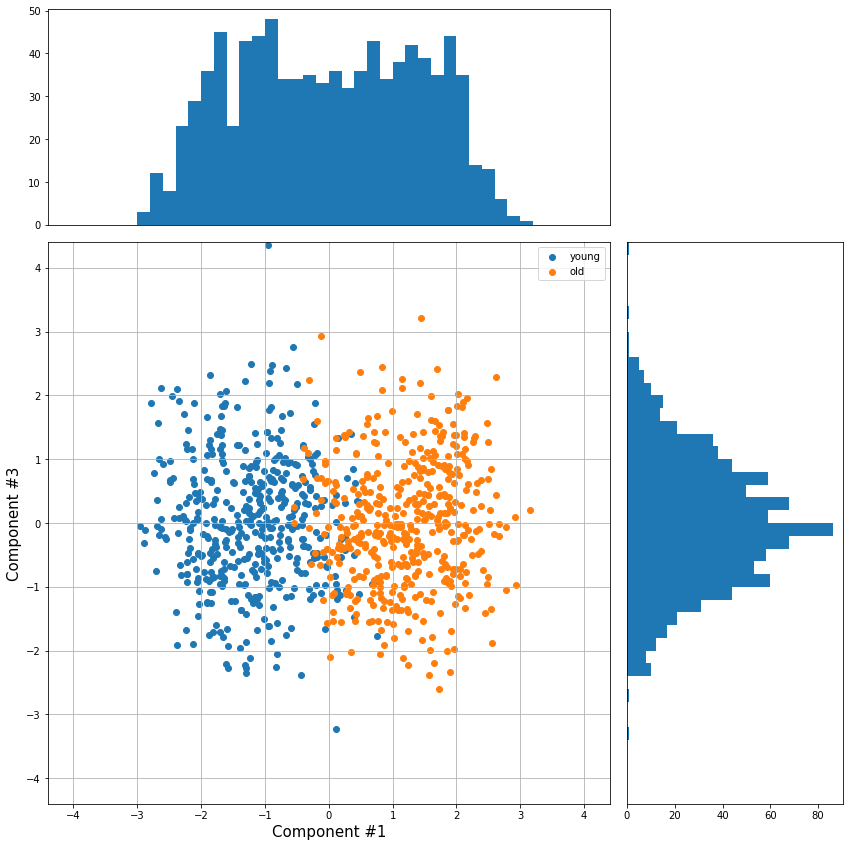

In [23]:
plot_PCA(0,2)

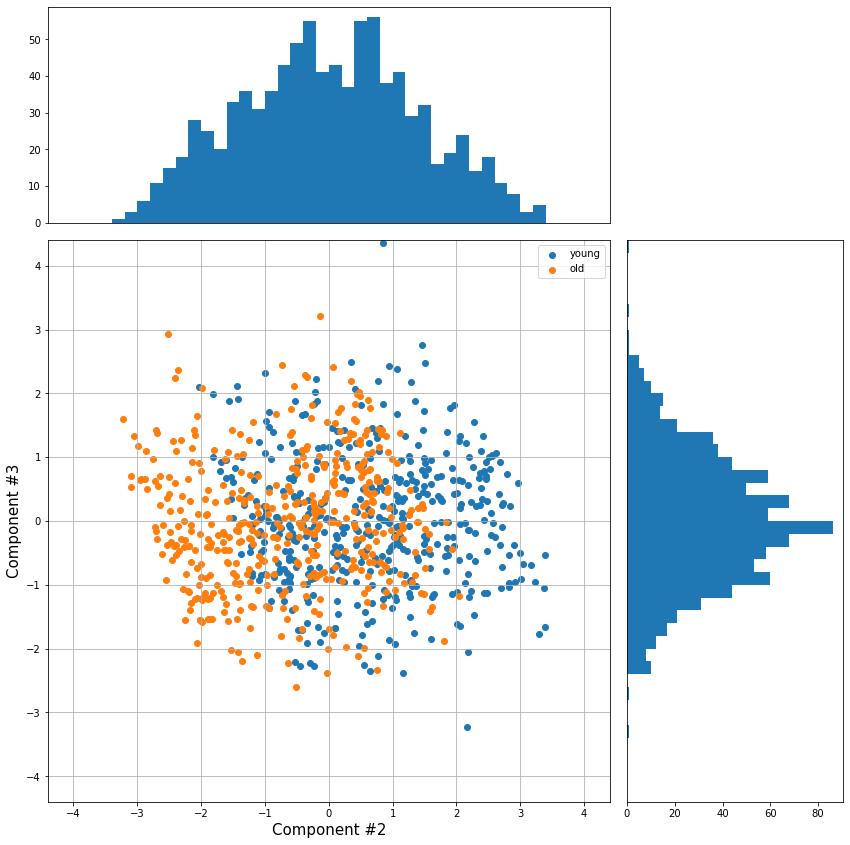

In [24]:
plot_PCA(1,2)

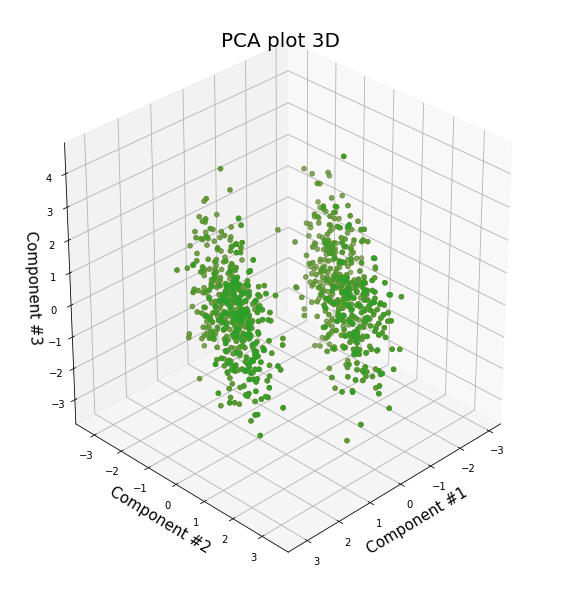

In [25]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=45)

for idt, _ in enumerate(targets):
    ax.scatter(PCA_df.iloc[:,0], 
               PCA_df.iloc[:,1],
               PCA_df.iloc[:,2])

ax.grid()
ax.set_xlabel(PCA_df.columns[0], fontsize = 15)
ax.set_ylabel(PCA_df.columns[1], fontsize = 15)
ax.set_zlabel(PCA_df.columns[2], fontsize = 15)
ax.set_title('PCA plot 3D', fontsize = 20)
plt.show()

,age,particle 1,particle 2,desease 1,disease 2
0,-0.470265,-0.811951,-0.345813,3.613141e-17,-3.559307e-17
1,-0.136465,-0.257948,0.956473,-9.635042e-18,1.617867e-17
2,0.874774,-0.484500,-0.005452,1.619891e-16,-3.397521e-17
3,-0.496900,-0.866619,0.045402,4.817521e-17,-1.488438e-16
4,0.874774,-0.484500,-0.005452,1.908943e-16,-3.235734e-17


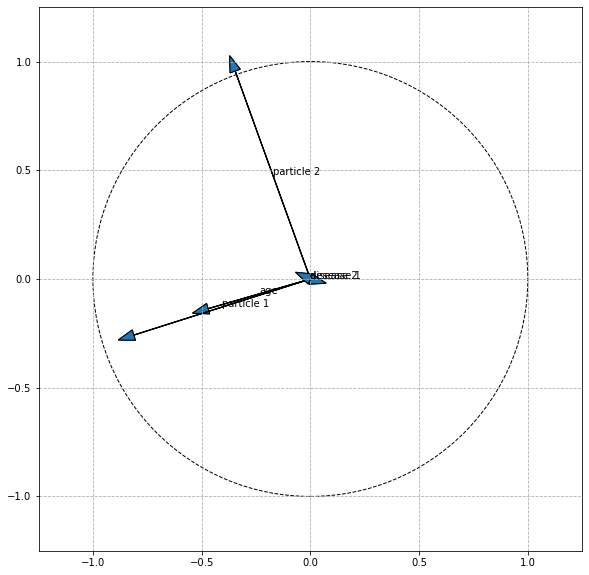

In [26]:
test_df = (df-df.mean())/df.std()
test_df = test_df[test_df.columns[:-1]]

gla = pd.DataFrame(data=[[np.corrcoef(test_df[c],PCA_df.iloc[:,n])[1,0] 
               for n in range(pca.n_components_)] for c in test_df],
             index=[0,1,2,3,4],
             columns = test_df.columns)
display(gla)


# Plot

fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

circle1 = plt.Circle((0, 0), 1, color='k', linestyle='--', fill=False)
ax.add_artist(circle1)

for c in test_df:
    ax.annotate(c, xy=(gla[c][0]/2, gla[c][1]/2))
    ax.add_artist(plt.arrow(0, 0, gla[c][0], gla[c][1], head_width=0.05))
    
ax.set_aspect(1)
plt.grid(linestyle='--')

plt.show()